<a href="https://colab.research.google.com/github/fjadidi2001/Machine_Learning_Journey/blob/main/Machine_learning_FJ_S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Install and enable the `ipywidgets` library, which allows you to create interactive widgets in your notebooks.

1. **`!pip install ipywidgets`**:
   - This command uses the `pip` package manager to install the `ipywidgets` library.
   - The `!` at the beginning indicates that this command should run in the shell (command line) instead of Python.
   - By installing `ipywidgets`, you can utilize various interactive controls like sliders, buttons, and dropdowns within your Jupyter Notebook.

2. **`!jupyter nbextension enable --py widgetsnbextension`**:
   - This command enables the Jupyter notebook extension that supports `ipywidgets`.
   - `nbextension` is a way to add additional features and functionalities to Jupyter Notebooks.
   - The `--py` flag specifies that you are enabling a Python extension.
   - After running this command, the interactive widgets will be fully functional in the Jupyter Notebook interface.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm as cm

1. **`import numpy as np`**: This imports the NumPy library, which is a powerful library for numerical computing in Python. It provides support for arrays, matrices, and many mathematical functions.

2. **`import matplotlib.pyplot as plt`**: This imports the `pyplot` module from the Matplotlib library, which is widely used for creating static, animated, and interactive visualizations in Python.

3. **`import ipywidgets as widgets`**: This imports the `ipywidgets` library, which allows for the creation of interactive HTML widgets in Jupyter notebooks. It can be used to build interactive interfaces for data visualization.

4. **`from IPython.display import display`**: This imports the `display` function from IPython's display module, which is used to display objects like dataframes, images, and widgets within Jupyter notebooks.

5. **`from sklearn.model_selection import train_test_split`**: This imports the `train_test_split` function from Scikit-learn. This function is used to split datasets into training and testing sets, which is a crucial step in model validation and evaluation.

6. **`from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay`**: This imports several metrics from Scikit-learn useful for assessing the performance of machine learning models:
   - `accuracy_score` calculates the accuracy of the model predictions.
   - `confusion_matrix` generates a confusion matrix to evaluate the performance of a classification model.
   - `ConfusionMatrixDisplay` is a convenient way to visualize the confusion matrix.

7. **`import matplotlib.cm as cm`**: This imports the colormap module from Matplotlib, which provides a range of color maps helpful for visualizing data in various formats (e.g., heatmaps, scatter plots).



In [3]:
class KNNClassifier:
    def __init__(self, k=3, distance_func=None):
        self.k = k
        if distance_func is None:
            self.distance_func = self._euclidean_distance
        else:
            self.distance_func = distance_func

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def _minkowski_distance(self, x1, x2, p=3):
        return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

    def predict(self, X):
        predictions = []
        for index, x in enumerate(X):
            distances = [self.distance_func(x, x_train) for x_train in self.X_train]

            # indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            # labels of the k nearest neighbors
            k_neighbor_labels = self.y_train[k_indices]
            # majority vote
            counts = np.bincount(k_neighbor_labels.astype(int))
            predicted_label = np.argmax(counts)
            predictions.append(predicted_label)

        return np.array(predictions)

#Defines a simple K-Nearest Neighbors (KNN) classifier in Python. Here's a breakdown of what each part does:

### Class Definition
- **`class KNNClassifier`**: This defines a class named `KNNClassifier`, which implements the KNN algorithm.

### Initialization Method (`__init__`)
- **`def __init__(self, k=3, distance_func=None):`**: This is the constructor method that initializes an instance of the `KNNClassifier`.
  - **Parameters**:
    - `k`: The number of nearest neighbors to consider for making predictions. It defaults to `3`.
    - `distance_func`: A custom distance function to use for calculating distances between points. If not provided, it will use the default Euclidean distance.
  
- **`self.k = k`**: This assigns the number of neighbors (`k`) for the classifier instance.

- **`if distance_func is None:`**: This checks if a custom distance function was supplied.
  - **`self.distance_func = self._euclidean_distance`**: If no custom function is provided, it sets the distance function to the internal method `_euclidean_distance`, which calculates Euclidean distance.

### Fitting the Model (`fit` method)
- **`def fit(self, X, y):`**: This method is used to fit the KNN model to the training data.
  - **Parameters**:
    - `X`: The feature set (input data) used for training.
    - `y`: The labels (output data) corresponding to the training features.

- **`self.X_train = X`**: This stores the training feature set in the classifier object for future predictions.


### Summary
In summary, this KNN classifier class allows users to create a KNN model by specifying the number of neighbors `k` and optionally selecting a custom distance function. The `fit` method stores the training data for later use when making predictions, which would be based on the nearest neighbors' labels in the full implementation.

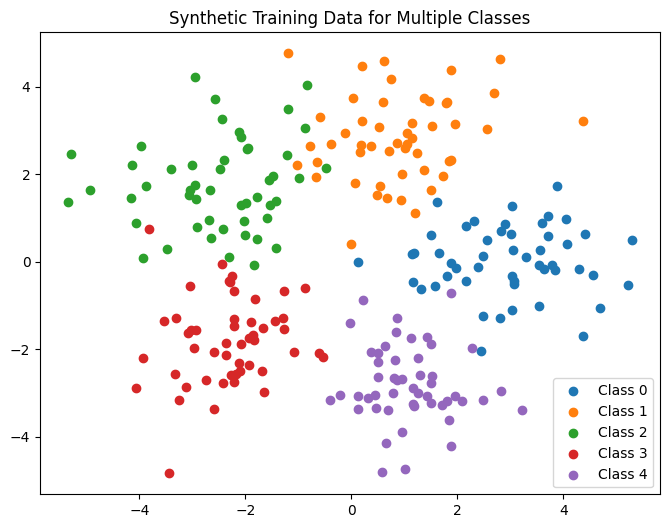

In [4]:
def generate_synthetic_data(m=3, num_points_per_class=100, cluster_std=1.0):
    np.random.seed(40)
    X = []
    y = []
    means = []
    for i in range(m):
        angle = 2 * np.pi * i / m
        radius = 3
        mean = [radius * np.cos(angle), radius * np.sin(angle)]
        means.append(mean)
        cov = [[cluster_std, 0], [0, cluster_std]]
        class_data = np.random.multivariate_normal(mean, cov, num_points_per_class)
        X.append(class_data)
        y += [i] * num_points_per_class

    X = np.vstack(X)
    y = np.array(y)
    return X, y, means

m = 5  # number of classes
num_points_per_class = 50
cluster_std = 1.0

X, y, class_means = generate_synthetic_data(m=m, num_points_per_class=num_points_per_class, cluster_std=cluster_std)

plt.figure(figsize=(8,6))
colors = plt.colormaps['tab10'].colors
for i in range(m):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=f'Class {i}')
plt.title('Synthetic Training Data for Multiple Classes')
plt.legend()
plt.show()